In [1]:
## Install Dependencies
!pip install tensorflow opencv-python matplotlib

## Import Dependencies

In [2]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [ ]:
# Model(inputs =[inputimage, verificationimage], outputs = [1,0])

In [ ]:
# class L1Dist(Layer)

## Set GPU Growth

In [4]:
# Avoid OOM errors by setting GPU Memory Consuption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

## Create Folder Structures

In [ ]:
# Setup paths (This is for local use)
# POS_PATH = os.path.join('data', 'positive')
# NEG_PATH = os.path.join('data', 'negative')
# ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
# Make the directories (This is for local use)
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BASE_PATH = '/content/drive/MyDrive/Vita_face_recognition/data'

POS_PATH = os.path.join(BASE_PATH, 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'negative')
ANC_PATH = os.path.join(BASE_PATH, 'anchor')

os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

POS_PATH, NEG_PATH, ANC_PATH

('/content/drive/MyDrive/Vita_face_recognition/data/positive',
 '/content/drive/MyDrive/Vita_face_recognition/data/negative',
 '/content/drive/MyDrive/Vita_face_recognition/data/anchor')

In [ ]:
# Move LFW Images to the following repository data/negative
LFW_PATH = '/content/drive/MyDrive/Vita_face_recognition/lfw-deepfunneled'

for directory in os.listdir(LFW_PATH):
    dir_path = os.path.join(LFW_PATH, directory)

    # 確保是資料夾，不是其他奇怪的檔案
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            EX_PATH = os.path.join(dir_path, file)
            NEW_PATH = os.path.join(NEG_PATH, file)

            os.replace(EX_PATH, NEW_PATH)

## 2. Collect Positive and Anchor Classes

In [6]:
# Import uuid library to generate unique image names
import uuid

In [6]:
# Establish a connection to the webcam
# cap = cv2.VideoCapture(3)
# while cap.isOpened():
#   ret, frame = cap.read()  #frame is the real image

#   # Show image back to screen
#   cv2.imshow('Image Collection', frame)

#   # Breaking gracefully
#   if cv2.waitKey(1) & 0XFF == ord('q'):
#     break
# # Release the webcam
# cap.release()
# #Close the image show frame
# cv2.destroyAllWindows()

from google.colab.output import eval_js
from IPython.display import display, Javascript
import cv2
import numpy as np
import base64

# Convert JS base64 → OpenCV frame
def js_to_image(js_data):
    img_bytes = base64.b64decode(js_data.split(',')[1])
    img_np = np.frombuffer(img_bytes, dtype=np.uint8)
    return cv2.imdecode(img_np, cv2.IMREAD_COLOR)

# A function that takes ONE photo each time it's called
def capture_frame():
    js = Javascript('''
      async function takePhoto() {
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;

        await video.play();

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();

        return canvas.toDataURL('image/jpeg', 0.9);
      }
    ''')
    display(js)
    data = eval_js("takePhoto()")
    return js_to_image(data)


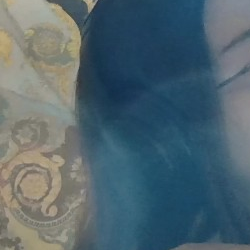

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [8]:
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import time

while True:
    frame = capture_frame()

    #Cut down frame to 250*250px
    frame = frame[140:140+250, 200:200+250, :]

    #Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
      # Create the unique file path
      imgname = os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
      # Write out anchor image
      cv2.imwrite(imgname, frame)

    #Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
      imgname = os.path.join(POS_PATH, '{}'.jpg.format(uuid.uuid1()))
      cv2.imwrte(imgname, frame)

    clear_output(wait=True)
    cv2_imshow(frame)

    time.sleep(0.1)

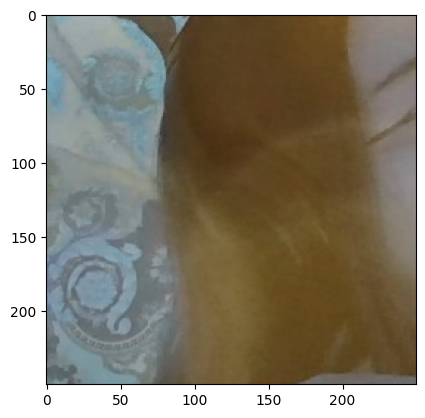

In [9]:
plt.imshow(frame)

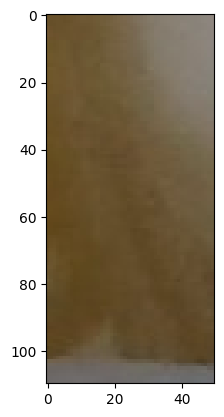

In [10]:
# the original frame is (480, 640, 3) should be converted into (250, 250, 3)
plt.imshow(frame[140:140+250, 200:200+250, :])

準備啟動相機...


<IPython.core.display.Javascript object>

Saved to photo.jpg


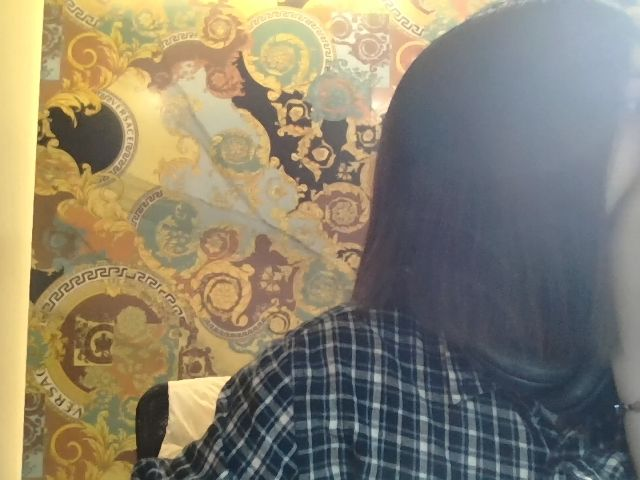

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  # 定義 JavaScript 程式碼，這次我們直接讓它執行並回傳 Promise
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // 等待按鈕被點擊
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

  # 1. 先顯示 JS 定義 (注入到當前 Context)
  display(js)

  # 2. 使用 eval_js 呼叫該函數並等待 Promise 回傳
  data = eval_js('takePhoto({})'.format(quality))

  # 3. 處理回傳的 Base64 圖片數據
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

print("準備啟動相機...")
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # 顯示剛拍的照片
  from IPython.display import Image
  display(Image(filename))
except Exception as err:
  # 如果使用者沒有相機權限或取消
  print(str(err))



In [5]:
import os, uuid

BASE_PATH = '/content/drive/MyDrive/Vita_face_recognition/data'

POS_PATH = os.path.join(BASE_PATH, 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'negative')
ANC_PATH = os.path.join(BASE_PATH, 'anchor')
print("✔ 目錄已建立：")
print(POS_PATH)
print(NEG_PATH)
print(ANC_PATH)


✔ 目錄已建立：
/content/drive/MyDrive/Vita_face_recognition/data/positive
/content/drive/MyDrive/Vita_face_recognition/data/negative
/content/drive/MyDrive/Vita_face_recognition/data/anchor


In [ ]:
import os
import uuid
from google.colab import output
from IPython.display import display, Javascript, HTML
from base64 import b64decode

# 1. 確保路徑存在 (請確保您的 BASE_PATH 已在上方定義過)
# BASE_PATH = '/content/drive/MyDrive/Vita_face_recognition/data'
# POS_PATH = os.path.join(BASE_PATH, 'positive')
# ANC_PATH = os.path.join(BASE_PATH, 'anchor')

if not os.path.exists(POS_PATH): os.makedirs(POS_PATH)
if not os.path.exists(ANC_PATH): os.makedirs(ANC_PATH)

# 2. Python 存檔函數 (維持不變)
def save_image_callback(data_url, img_type):
    filename = f"{uuid.uuid4()}.jpg"

    if img_type == 'anchor':
        save_path = os.path.join(ANC_PATH, filename)
        label_text = "Anchor"
    elif img_type == 'positive':
        save_path = os.path.join(POS_PATH, filename)
        label_text = "Positive"
    else:
        return

    try:
        # 解碼並寫入
        binary = b64decode(data_url.split(',')[1])
        with open(save_path, 'wb') as f:
            f.write(binary)
        # 回傳給 JS 更新計數器
        return Javascript(f"updateCounter('{label_text}')")
    except Exception as e:
        print(f"Error saving image: {e}")

output.register_callback('notebook.save_image', save_image_callback)

# 3. 前端 HTML/JS (修改了繪圖部分)
html_code = '''
<div style="display: flex; flex-direction: column; align-items: center; font-family: sans-serif;">
    <h3>⚡️ 自動化收集器 (250x250 中心裁切)</h3>
    <video id="video" width="400" height="300" autoplay style="border: 3px solid #444; border-radius: 8px; object-fit: cover;"></video>
    <canvas id="canvas" style="display:none;"></canvas>

    <div style="margin-top: 15px; display: flex; gap: 10px;">
        <button id="btn-auto-anchor" style="padding: 10px 15px; background-color: #007bff; color: white; border: none; border-radius: 5px; cursor: pointer; font-weight: bold;">
            🔄 自動 Anchor (開始)
        </button>
        <button id="btn-auto-positive" style="padding: 10px 15px; background-color: #28a745; color: white; border: none; border-radius: 5px; cursor: pointer; font-weight: bold;">
            🔄 自動 Positive (開始)
        </button>
    </div>

    <div style="margin-top: 10px;">
         <button id="btn-stop-capture" disabled style="padding: 10px 40px; background-color: #ffc107; color: black; border: none; border-radius: 5px; cursor: not-allowed; font-weight: bold;">
            ⏹ 停止自動拍攝
        </button>
         <button id="btn-close-cam" style="padding: 10px 20px; background-color: #dc3545; color: white; border: none; border-radius: 5px; cursor: pointer; margin-left: 10px;">
            ❌ 關閉相機
        </button>
    </div>

    <div style="margin-top: 15px; text-align: center;">
        <p id="status" style="color: #333; font-weight: bold;">準備就緒 (目標尺寸: 250x250)</p>
        <p style="font-size: 0.9em; color: gray;">
            Anchor 已拍: <span id="count-anchor" style="color: blue; font-weight:bold;">0</span> 張 |
            Positive 已拍: <span id="count-positive" style="color: green; font-weight:bold;">0</span> 張
        </button>
    </div>
</div>

<script>
(async function() {
    const video = document.getElementById('video');
    const canvas = document.getElementById('canvas');
    const context = canvas.getContext('2d');
    const status = document.getElementById('status');

    const btnAutoAnchor = document.getElementById('btn-auto-anchor');
    const btnAutoPositive = document.getElementById('btn-auto-positive');
    const btnStopCapture = document.getElementById('btn-stop-capture');
    const btnCloseCam = document.getElementById('btn-close-cam');

    let stream = null;
    let captureInterval = null;
    let counts = { 'Anchor': 0, 'Positive': 0 };

    // --- 關鍵修改: 設定目標尺寸 ---
    const TARGET_SIZE = 250;

    // 啟動相機
    try {
        stream = await navigator.mediaDevices.getUserMedia({ video: { width: { ideal: 640 }, height: { ideal: 480 } } });
        video.srcObject = stream;
        // 等待影片metadata載入完成，確保能抓到正確寬高
        await new Promise(resolve => video.onloadedmetadata = resolve);
    } catch (err) {
        status.innerText = "相機啟動失敗: " + err;
        status.style.color = "red";
        return;
    }

    // --- 核心修改: 拍照並進行中心裁切與縮放 ---
    function captureAndSend(type) {
        if (!stream || !stream.active || video.videoWidth === 0) return;

        const vw = video.videoWidth;
        const vh = video.videoHeight;

        // 1. 計算來源影像中，要裁切的正方形大小 (取長寬較短的那邊)
        const sourceSize = Math.min(vw, vh);

        // 2. 計算裁切的起始點 (讓正方形置中)
        const sx = (vw - sourceSize) / 2;
        const sy = (vh - sourceSize) / 2;

        // 3. 設定 Canvas 的最終大小為目標尺寸 (250x250)
        canvas.width = TARGET_SIZE;
        canvas.height = TARGET_SIZE;

        // 4. 執行裁切並縮放繪圖
        // drawImage 參數: (來源, 來源X, 來源Y, 來源寬, 來源高, 目標X, 目標Y, 目標寬, 目標高)
        context.drawImage(video, sx, sy, sourceSize, sourceSize, 0, 0, TARGET_SIZE, TARGET_SIZE);

        // 轉成 JPG，品質 0.9
        const dataUrl = canvas.toDataURL('image/jpeg', 0.9);

        // 呼叫 Python
        google.colab.kernel.invokeFunction('notebook.save_image', [dataUrl, type], {});
    }

    // 啟動自動拍攝 (維持不變)
    function startAuto(type) {
        stopAuto();
        status.innerText = `正在自動拍攝: ${type} (250x250, 每秒一張)...`;
        status.style.color = "red";
        btnStopCapture.disabled = false;
        btnStopCapture.style.cursor = "pointer";
        btnStopCapture.style.backgroundColor = "#ffc107";

        captureInterval = setInterval(() => {
            captureAndSend(type);
            video.style.borderColor = type === 'anchor' ? '#007bff' : '#28a745';
            setTimeout(() => video.style.borderColor = '#444', 200);
        }, 1000);
    }

    // 停止自動拍攝 (維持不變)
    function stopAuto() {
        if (captureInterval) {
            clearInterval(captureInterval);
            captureInterval = null;
        }
        status.innerText = "自動拍攝已暫停";
        status.style.color = "#333";
        btnStopCapture.disabled = true;
        btnStopCapture.style.cursor = "not-allowed";
        btnStopCapture.style.backgroundColor = "#ddd";
    }

    // 更新計數器 (維持不變)
    window.updateCounter = function(label) {
        if (counts[label] !== undefined) {
            counts[label]++;
            document.getElementById('count-' + label.toLowerCase()).innerText = counts[label];
        }
    };

    // 按鈕事件綁定
    btnAutoAnchor.onclick = () => startAuto('anchor');
    btnAutoPositive.onclick = () => startAuto('positive');
    btnStopCapture.onclick = () => stopAuto();
    btnCloseCam.onclick = () => {
        stopAuto();
        if (stream) stream.getTracks().forEach(track => track.stop());
        video.srcObject = null;
        status.innerText = "相機已關閉";
    };

})();
</script>
'''

display(HTML(html_code))

### 2.X NEW - Data Augmentation

In [7]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

        data.append(img)

    return data

In [8]:
import os
import uuid

In [ ]:
img_path = os.path.join(ANC_PATH, '924e839c-135f-11ec-b54e-a0cec8d2d278.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [16]:
for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

## 3. Load and Preprocess Images

### 3.1 Get Image Directories

In [17]:
positive = tf.data.Dataset.list_files('/content/drive/MyDrive/Vita_face_recognition/data/positive/*.jpg').take(3000)
negative = tf.data.Dataset.list_files('/content/drive/MyDrive/Vita_face_recognition/data/negative/*.jpg').take(3000)
anchor   = tf.data.Dataset.list_files('/content/drive/MyDrive/Vita_face_recognition/data/anchor/*.jpg').take(3000)


In [18]:
dir_test = anchor.as_numpy_iterator()

In [19]:
dir_test.next()

b'/content/drive/MyDrive/Vita_face_recognition/data/anchor/30d5b622-3516-4bd8-af02-79ac5cb59b1b.jpg'

### 3.2 Preprocessing -Scale and Resize

In [4]:
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [21]:
img = preprocess(b'/content/drive/MyDrive/Vita_face_recognition/data/anchor/496e3068-cb09-452a-9fae-396c20c08185.jpg')

In [22]:
img.numpy().max()

np.float32(0.8078432)

## 3.3 Create Labelled Dataset

In [23]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [24]:
samples = data.as_numpy_iterator()

In [25]:
exampple = samples.next()

np.float32(0.0)

In [28]:
example

### 3. revise


## 3.4 Build Train and Test Partition

In [29]:
def preprocess_twin(input_img, validation_img, label):
  return (preprocess(input_img), preprocess(validation_img), label)

In [30]:
res = preprocess_twin(*example)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.8431373 , 0.8000001 , 0.62352943],
         [0.8431373 , 0.8000001 , 0.61960787],
         [0.8470589 , 0.79215693, 0.6156863 ],
         ...,
         [0.8078432 , 0.77647066, 0.59607846],
         [0.78823537, 0.7607844 , 0.5803922 ],
         [0.7725491 , 0.7490196 , 0.56078434]],
 
        [[0.8117648 , 0.77647066, 0.62352943],
         [0.83921576, 0.79215693, 0.63529414],
         [0.83921576, 0.78823537, 0.6117647 ],
         ...,
         [0.7960785 , 0.7686275 , 0.59607846],
         [0.7803922 , 0.75294125, 0.57254905],
         [0.77647066, 0.75294125, 0.5647059 ]],
 
        [[0.7019608 , 0.6745098 , 0.5647059 ],
         [0.8235295 , 0.78823537, 0.65882355],
         [0.7843138 , 0.7490196 , 0.5803922 ],
         ...,
         [0.76470596, 0.7490196 , 0.57254905],
         [0.7568628 , 0.7411765 , 0.5568628 ],
         [0.76470596, 0.7490196 , 0.5647059 ]],
 
        ...,
 
        [[0.49803925, 0.37647063

In [30]:
plt.imshow(res[1])

In [ ]:
res[2]

In [ ]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [ ]:

# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:

# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

## 4.1 Build Embedding Layer

In [31]:
# 讓模型學習105*105*3圖片中提取基礎特徵(邊緣, 角點) 並將數據轉換為105*105*64
inp = Input(shape=(105, 105, 3), name = 'input_image')
# Conv2D 卷機層, 64濾波器數量, (10, 10)核心尺寸, activation=relu 激活函數
c1 = Conv2D(64, (10, 10), activation='relu')(inp)
# MaxPooling2D 用來縮小特徵圖的尺寸, 減少計算量

# 1. 卷積 (Conv2D)： 專家用不同倍率的顯微鏡 (64, 128, 128 個濾鏡) 掃描照片，找出鼻子、眼睛、嘴巴、臉部輪廓等複雜的細節和特徵。


# 2. ReLU： 決定哪些找到的特徵是有意義的 (非負數就保留，負數就忽略)。


# 3. 最大池化 (MaxPooling2D)： 將照片縮小，丟棄不重要的背景細節，只保留每個區域最明顯的特徵。

In [37]:

def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')


In [38]:
embedding = make_embedding()

In [39]:
# CNN 將100 * 100 的圖片轉換為4096維的特徵向量

embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

### 4.2 Build Distance Layer


##### 定義一個客製化的Keras層 (Custom Keras Layer), 核心功能是計算兩個輸入向量之間的L1距離(L1 Distance) 也被稱為曼哈頓距離(Manhattan Distance), 用來比較兩張圖片特徵差異的關鍵部分。也就是判斷是否為同一人的證據


In [40]:
# Siamese L1 Distance class
class L1Dist(Layer):

  # Init method - inheritance
  def __init__(self, **kwargs):
    super().__init__()

  # Magic happens here - similarity calculation
  # def call(self, input_embedding, validation_embedding):
  #   return tf.math.abs(input_embedding - validation_embedding)
  # Magic happens here - similarity calculation
  def call(self, input_embedding, validation_embedding):
      return tf.math.abs(input_embedding - validation_embedding)

In [41]:
l1 = L1Dist()

### 4.3 Make Siamese Model

In [42]:
input_image = Input(name = 'input_img', shape=(100, 100, 3))
validation_image = Input(name = 'validation_img', shape = (100, 100, 3))

In [43]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [44]:
inp_embedding

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_26>

In [45]:
siamese_layer = L1Dist()

In [46]:
siamese_layer([inp_embedding, val_embedding])

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_28>

### input_image (Anchor): 定義第一個輸入: 稱為Anchor團片
### validation_image (Positive/Negative): 定義第二個輸入: 通常是與Anchor圖片配對的Positive(同人) 或 Negative(不同人) 圖片。

### 他們都會流經相同的特徵提取器(Embedding Model)。

1. embedding(input_image): 將第一個輸入圖片 (input_image) 傳入您定義的 特徵提取器模型 (embedding) 中。它會輸出 Anchor 圖片的 4096 維身份編碼 (Embedding Vector)。
2. embedding(validation_image): 關鍵： 將第二個輸入圖片 (validation_image) 傳入同一個 特徵提取器模型 (embedding) 中。由於 Keras 預設會共享權重 (Share Weights)，所以這兩個輸入實際上是使用同一組訓練好的權重來進行特徵提取。
3. siamese_layer([...]): 將兩個 $4096$ 維的嵌入向量作為一個列表傳入 L1Dist 層中。這與您在 L1Dist 的 call 函數中寫的 def call(self, inputs): input_embedding, validation_embedding = inputs 相匹配。
4. distances: 這個變數現在就是 L1Dist 層計算出來的 $4096$ 維 差異向量 (Difference Vector)

### classification layer 分類輸出層
1.  $4096$ 維的 差異向量 (distances)。
2. Dense(1, activation = 'sigmoid')： 這是最終的二元分類器。
* 1 個節點： 輸出一個單一數值。
* Sigmoid 激活： 將輸出數值壓縮到 $0$ 到 $1$ 之間。
3. 功能： 根據輸入的差異向量，預測這兩張圖片的相似度分數：
* 分數接近 1： 模型認為是 匹配 (同一個人/類)。
* 分數接近 0： 模型認為是 不匹配 (不同人/類)。

In [47]:
def make_siamese_model():

  # Anchor image input in the network
  input_image = Input(name = 'input_img', shape=(100, 100, 3))

  # Validation image in the network
  validation_image = Input(name = 'validation_img', shape = (100, 100, 3))

  # Combine siamese distance components
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  # distances = siamese_layer(embedding(input_image), embedding(validation_image))
  distances = siamese_layer([embedding(input_image), embedding(validation_image)])

  # Classification Layer
  classifier = Dense(1, activation = 'sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs = classifier, name = 'SiameseNetwork')


In [48]:
siamese_model = make_siamese_model()

In [49]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Training

### 5.1 Setup Loss and Optimizer

### binary_cross_loss = tf.losses.BinaryCrossentropy() 這是二元交叉熵損失函數。專門用於二元分類問題
### 如果模型預測 $0.9$ (接近 1)，而真實標籤是 1 (匹配)，損失就會很小。如果模型預測 $0.1$ (接近 0)，而真實標籤是 1 (匹配)，損失就會很大。訓練目標： 模型在訓練過程中的唯一目標就是最小化這個損失函數的輸出值。

In [50]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [51]:
from tensorflow import keras
opt = tf.keras.optimizers.Adam(1e-4) #0.0001

### 5.2 Establish Checkpoints

In [52]:
# 將 checkpoint_dir 指向 Google Drive 上的目標路徑
checkpoint_dir = '/content/drive/MyDrive/Vita_face_recognition/training_checkpoints_v2'

# 設置檢查點文件的前綴名稱 (例如：ckpt-1, ckpt-2)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

# 創建一個 tf.train.Checkpoint 物件
# 這個物件會追蹤和儲存您指定的變數（opt, siamese_model）的狀態。
checkpoint = tf.train.Checkpoint(opt = opt, siamese_model = siamese_model)

#### 5.3 Build Train Step Function

### The basic flow for training on one batch is as follows:
1. Make a prediction
2. Calculate loss
3. Derive gradients
4. Calculate new weights and apply

In [53]:
test_batch = train_data.as_numpy_iterator()

In [54]:
batch_1 = test_batch.next()

In [55]:
X = batch_1[:2]

In [ ]:
y = batch_1[2]

In [56]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [ ]:
tf.losses.BinaryCrossentropy??

In [57]:
@tf.function
def train_step(batch):

  # Record all of our operations
  with tf.GradientTape() as tape:
    #Get anchor and positive/negative image
    X = batch[:2]
    # Get label
    y = batch[2]

    # Forward pass
    yhat = siamese_model(X, training = True)
    # Calculate loss
    loss = binary_cross_loss(y, yhat)
  tf.print(loss)

  # Calculate gradients
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  # Calculate updated weights and apply to siamese model
  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

  # Return loss
  return loss


### 5.4 Build Training Loop

In [58]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [59]:
# def train(data, EPOCHS):
#     # Loop through epochs
#     for epoch in range(1, EPOCHS+1):
#         print('\n Epoch {}/{}'.format(epoch, EPOCHS))
#         progbar = tf.keras.utils.Progbar(len(data))

#         # Creating a metric object
#         r = Recall()
#         p = Precision()

#         # Loop through each batch
#         for idx, batch in enumerate(data):
#             # Run train step here
#             loss = train_step(batch)
#             yhat = siamese_model.predict(batch[:2])
#             r.update_state(batch[2], yhat)
#             p.update_state(batch[2], yhat)
#             progbar.update(idx+1)
#         print(loss.numpy(), r.result().numpy(), p.result().numpy())

#         # Save checkpoints
#         if epoch % 10 == 0:
#             checkpoint.save(file_prefix=checkpoint_prefix)
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())

        # 每 10 個 epoch 存一次檔就好了
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

### 5.5 Train the model

In [60]:
EPOCHS = 50

In [61]:
train(train_data, EPOCHS)


 Epoch 1/50
8.0590477
 1/93 ━━━━━━━━━━━━━━━━━━━━ 9:21 6s/step7.05166674
 2/93 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step9.06648827
 3/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step4.02952385
 4/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step9.06642914
 5/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step9.06642914
 6/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step10.0738096
 7/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step4.02952385
 8/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step9.06642914
 9/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step7.05166674
10/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step9.06642914
11/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step9.06642914
12/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step7.05166674
13/93 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step4.02952385
14/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step10.0738096
15/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step9.06642914
16/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step7.05166674
17/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step6.04428577
18/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step10.0738096
19/93 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step8.0590477
20/93 ━━━━

## 6. Evaluate Model

### 6.1 Import Metrics

In [62]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

### 6.2 Make Predictions

In [63]:
# Get a batch of test data
# test_input: Anchor 圖片的張量(Tensor)
# test_val: Validation 圖片 (與Anchor 配對的圖片)的張量
# y_true: 真實標籤的陣列(0或1)
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [64]:
# test_var = test_data.as_numpy_iterator().next()

In [65]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [66]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [67]:
y_true #真實答案

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

### 6.3 Calculate Metrics

In [68]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(0.0)

In [69]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(0.0)

In [70]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━

In [73]:
# 檢查模型到底預測了什麼
print("--- 開始診斷 ---")
for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])

    # 印出前 5 筆預測結果與真實標籤
    print("預測值 (yhat):", yhat[:5])
    print("真實值 (y_true):", y_true[:5])
    break # 看一批就夠了

--- 開始診斷 ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
預測值 (yhat): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
真實值 (y_true): [1. 0. 0. 1. 1.]


### 6.4 Viz Results

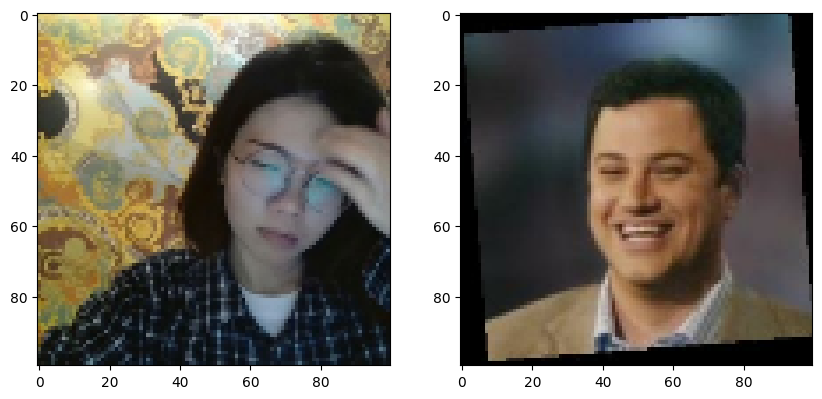

In [71]:
# Set plot size
plt.figure(figsize=(10, 8))

# Set first subplot
plt.subplot(1, 2, 1)
plt.imshow(test_input[3])

# Set second subplot
plt.subplot(1, 2, 2)
plt.imshow(test_val[3])

# Renders cleanly
plt.show()

## 7. Save Model

In [72]:
# Save weights
siamese_model.save('/content/drive/MyDrive/Vita_face_recognition/siamesemodelv2.h5')

In [ ]:
# Reload model
model = tf.keras.models.load_model('/content/drive/MyDrive/Vita_face_recognition/siamesemodel.h5', custom_objects = {'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

NameError: name 'test_input' is not defined

In [ ]:
  # View model summary
  model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_3 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

## 8. Real Time Test

### 8.1 Verification Function

In [ ]:
import os
os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'input_image', 'input_image.jpg')

'/content/drive/MyDrive/Vita_face_recognition/application_data/input_image/input_image.jpg'

In [ ]:
for image in os.listdir(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'verification_images')):
  validation_img = preprocess(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'verification_images', image))
  print(validation_img)


tf.Tensor(
[[[0.8132353  0.7632353  0.4867647 ]
  [0.8125     0.75171566 0.48112744]
  [0.84313726 0.76911765 0.5117647 ]
  ...
  [0.7147059  0.69534314 0.43676472]
  [0.73357844 0.71789217 0.4375    ]
  [0.7029412  0.6901961  0.43039215]]

 [[0.7622549  0.72745097 0.49362746]
  [0.80245095 0.7512255  0.5058824 ]
  [0.79534316 0.73014706 0.47058824]
  ...
  [0.7240196  0.6970588  0.48578432]
  [0.7134804  0.6992647  0.44240198]
  [0.7019608  0.6894608  0.42892158]]

 [[0.6625     0.64754903 0.48235294]
  [0.77843136 0.75661767 0.5612745 ]
  [0.7534314  0.7134804  0.48161766]
  ...
  [0.7318627  0.702451   0.51617646]
  [0.69460785 0.6779412  0.4372549 ]
  [0.7019608  0.6901961  0.42745098]]

 ...

 [[0.26397058 0.1985294  0.09215686]
  [0.18970588 0.1757353  0.12181372]
  [0.04093137 0.07254902 0.06568628]
  ...
  [0.05       0.07254902 0.08431373]
  [0.03431373 0.05588235 0.07352941]
  [0.04264706 0.07009804 0.09558824]]

 [[0.13161765 0.12990196 0.08063725]
  [0.0882353  0.10710784 0

In [ ]:
def verify(model, detection_threshold, verification_threshold):
  # Build results array
  results = []
  for image in os.listdir(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'vertification_images')):
    input_img = preprocess(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'input_image', 'input_image.jpg'))
    validation_img = preprocess(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'verification_images', image))

    # Make Predictions
    result = model.predict(list(np.expand_dims([input_img, validation_img], axis = 1)))
    results.append(result)

  # Detection Threshold: Metric above which a prediction is considered positive
  detection = np.sum(np.array(results) > detection_threshold)

  # Verification Threshold: Proportion of positive predictions / total positive samples
  verification = detection / len(os.listdir(os.path.join('/content/drive/MyDrive/Vita_face_recognition/application_data', 'vertification_images')))
  verified = verification > verification_threshold

  return results, verified

## 8.2 OpenCV Real Time Verification 轉到本地端

### Training Part two

#### 2. Data Augmentation

In [5]:
import uuid

In [6]:
len(os.listdir(ANC_PATH))

1120

In [9]:
def data_aug(img):
    data = []
    # 轉為 float32 處理，範圍 0-255
    img_tf = tf.cast(img, tf.float32)

    for i in range(9):
        new_seed = (np.random.randint(100), np.random.randint(100))

        # 1. 輕微亮度調整 (避免過曝)
        x = tf.image.stateless_random_brightness(img_tf, max_delta=0.15, seed=new_seed)
        # 2. 對比度調整
        x = tf.image.stateless_random_contrast(x, lower=0.7, upper=1.2, seed=new_seed)
        # 3. 隨機左右翻轉 (對人臉辨識很有幫助)
        x = tf.image.stateless_random_flip_left_right(x, seed=new_seed)
        # 4. 飽和度 (讓膚色有些微變化)
        x = tf.image.stateless_random_saturation(x, lower=0.8, upper=1.2, seed=new_seed)

        # 轉回 uint8
        x = tf.cast(tf.clip_by_value(x, 0, 255), tf.uint8)
        data.append(x)
    return data

In [12]:
# 建議只處理基準圖與正樣本
target_paths = [ANC_PATH, POS_PATH]

for target_dir in target_paths:
    print(f"正在增強: {target_dir} ...")
    files = [f for f in os.listdir(target_dir) if f.endswith(('.jpg', '.png'))]

    for file_name in files:
        img_path = os.path.join(target_dir, file_name)
        # 讀取並轉 RGB
        img = cv2.imread(img_path)
        if img is None: continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # 執行增強
        augmented_imgs = data_aug(img_rgb)

        # 儲存
        for aug_img in augmented_imgs:
            save_img = cv2.cvtColor(aug_img.numpy(), cv2.COLOR_RGB2BGR)
            cv2.imwrite(os.path.join(target_dir, f'{uuid.uuid1()}.jpg'), save_img)

print("✅ 全部增強完成！")

正在增強: /content/drive/MyDrive/Vita_face_recognition/data/anchor ...
正在增強: /content/drive/MyDrive/Vita_face_recognition/data/positive ...
✅ 全部增強完成！


#####3. Load and Preprocess Images

In [5]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img, channels=3) # 強制 3 通道
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

def preprocess_twin(input_img, validation_img, label):
    # 給模型讀取時，分別處理 Anchor 圖與比對圖
    return (preprocess(input_img), preprocess(validation_img), label)

In [6]:
# 加上 .shuffle(buffer_size=10000) 確保每次拿到的配對順序都不同
# 加上 .repeat() 確保即便圖片不夠 3000 張也能湊足數量

anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').cache().shuffle(10000).repeat().take(3000)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').cache().shuffle(10000).repeat().take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').cache().shuffle(10000).repeat().take(3000)

# 使用 .cache() 可以將讀取好的檔案名稱存在記憶體中，加速 Pipeline

##### 3.3 Create Labelled Dataset

In [7]:
# 合併標籤
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(3000))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(3000))))
data = positives.concatenate(negatives)

####3.4 Build Train and Test Partition 啟動Pipeline(套用Preprocess)



*   這是Preprocess發揮作用的地方, 透過.map()真正開始讀取圖片



In [8]:
# 這裡接上 preprocess_twin
data = data.map(preprocess_twin)
data = data.cache() # 既然用了 L4，cache 到記憶體會讓訓練飛快
data = data.shuffle(buffer_size=6000)

# 切分訓練與測試集
train_data = data.take(4200) # 6000 * 0.7
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

test_data = data.skip(4200).take(1800)
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

####4. Model Enginnering

#####4.1 Build Embedding Layer

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # Block 1
    x = Conv2D(64, (10,10), activation='relu')(inp)
    x = BatchNormalization()(x)
    # 修正：移除 64，只保留 pool_size
    x = MaxPooling2D((2,2), padding='same')(x)

    # Block 2
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = BatchNormalization()(x)
    # 修正：移除 64
    x = MaxPooling2D((2,2), padding='same')(x)

    # Block 3
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x) # 很好的選擇

    # Final Output Layer
    x = Dropout(0.3)(x)
    # 建議：最後增加一層 normalize，讓特徵向量長度固定，有助於 L1 距離計算
    # 但 linear 也可以，先保持你的設定
    d1 = Dense(1024, activation='linear')(x)

    return Model(inputs=[inp], outputs=[d1], name='embedding')

# 執行後檢查參數數量
embedding = make_embedding()
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 91, 91, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,210,304 (4.62 MB)

 Trainable params: 1,209,408 (4.61 MB)

 Non-trainable params: 896 (3.50 KB)

##### 4.2 Build Distance Layer

>把兩周圖(Anchor 和 Validation)放進去, 計算他們的距離



In [10]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, inputs):
        # 修正：加上這行來確保我們拿到的是兩個 Tensor
        # 處理嵌套列表的情況
        input_embedding = inputs[0]
        validation_embedding = inputs[1]

        # 如果 inputs[0] 還是列表，就再取一次 [0]
        if isinstance(input_embedding, list):
            input_embedding = input_embedding[0]
        if isinstance(validation_embedding, list):
            validation_embedding = validation_embedding[0]

        return tf.math.abs(input_embedding - validation_embedding)


#### 4.3 Make Siamese Model

In [11]:
def make_siamese_model():
    # 1. 定義兩個輸入端（Anchor 與 Validation）
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # 2. 實例化 L1 距離層
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'

    # --- 關鍵修正點：使用 [embedding(input1), embedding(input2)] ---
    # 這樣 L1Dist 內部的 call(self, inputs) 才能正確解構
    distances = siamese_layer([embedding(input_image), embedding(validation_image)])

    # 3. 分類層：輸出機率值（0~1）
    classifier = Dense(1, activation='sigmoid')(distances)

    # 4. 回傳完整模型
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

# 建立模型實例
siamese_model = make_siamese_model()

In [12]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1024)      │  1,210,304 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist (L1Dist)    │ (None, 1024)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      1,025 │ l1_dist[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,211,329 (4.62 MB)

 Trainable params: 1,210,433 (4.62 MB)

 Non-trainable params: 896 (3.50 KB)

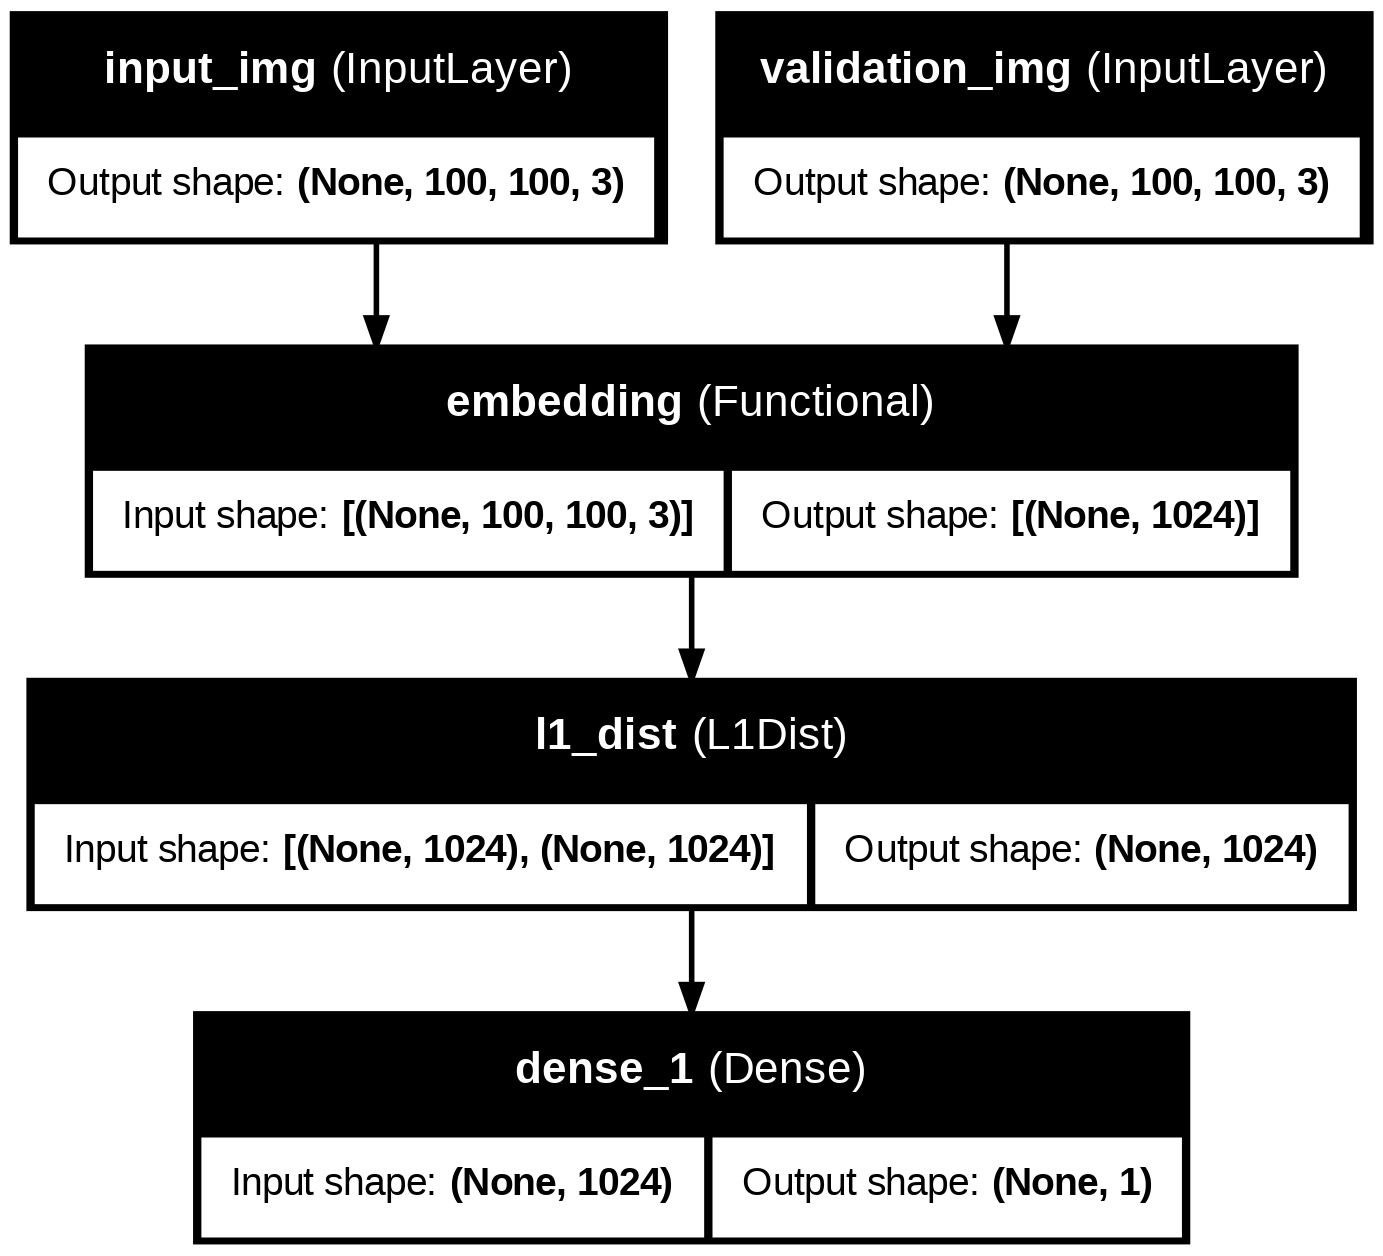

In [15]:
tf.keras.utils.plot_model(siamese_model, show_shapes=True, show_layer_names=True)

#### 5. Training

#####5.1 Setup Loss and Optimizer

In [13]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [14]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

#### 5.2 Establish Checkpoints

In [15]:
checkpoint_dir = '/content/drive/MyDrive/Vita_face_recognition/training_checkpoints_v2'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)
manager = tf.train.CheckpointManager(checkpoint, directory=checkpoint_dir, max_to_keep=3)

#### 5.3 Build Train Step Function

In [16]:
@tf.function
def train_step(batch):
    # 使用 GradientTape 紀錄運算
    with tf.GradientTape() as tape:
        # X 包含 [input_img, validation_img]
        X = batch[:2]
        # y 是標籤 (0 或 1)
        y = batch[2]

        # 1. 前向傳播 (Forward pass)
        # 注意：一定要傳入 training=True，這會啟動 BatchNorm 和 Dropout
        yhat = siamese_model(X, training=True)

        # 2. 計算損失
        loss = binary_cross_loss(y, yhat)

    # 3. 計算梯度 (Gradients)
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # 4. 套用梯度優化權重 (Optimization)
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # 關鍵修改：同時回傳 loss 和預測結果
    return loss, yhat

#### 5.4 Build Training Loop

In [17]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

def train(train_data, test_data, EPOCHS):
    # 追蹤最佳的「驗證集」成績
    best_val_acc = 0.0
    best_val_loss = float('inf')

    for epoch in range(1, EPOCHS+1):
        print(f'\n Epoch {epoch}/{EPOCHS}')
        progbar = tf.keras.utils.Progbar(len(train_data))

        # --- 訓練階段 (Train Step) ---
        # 這些指標是用來看訓練狀況的
        train_loss_sum = 0
        train_steps = 0

        for idx, batch in enumerate(train_data):
            loss_val, yhat = train_step(batch) # 這裡會更新權重
            train_loss_sum += loss_val.numpy()
            train_steps += 1
            progbar.update(idx+1)

        print(f"  Train Loss: {train_loss_sum/train_steps:.4f}")

        # --- 驗證階段 (Validation Step) ---
        # 這裡用來看模型真正的實力 (不會更新權重)
        val_acc = BinaryAccuracy()
        val_recall = Recall()
        val_precision = Precision()
        val_loss_sum = 0
        val_steps = 0

        for batch in test_data:
            X = batch[:2]
            y = batch[2]

            # 前向傳播 (training=False 表示這是考試，關閉 Dropout)
            yhat = siamese_model(X, training=False)
            loss = binary_cross_loss(y, yhat)

            # 更新驗證指標
            val_acc.update_state(y, yhat)
            val_recall.update_state(y, yhat)
            val_precision.update_state(y, yhat)
            val_loss_sum += loss.numpy()
            val_steps += 1

        # 計算驗證集平均結果
        current_val_loss = val_loss_sum / val_steps
        current_val_acc = val_acc.result().numpy()

        print(f"  Val Loss: {current_val_loss:.4f} | Val Acc: {current_val_acc:.4f} | Val Recall: {val_recall.result().numpy():.4f}")

        # --- 存檔判斷 (根據驗證集表現) ---

        # 1. 根據 Val Accuracy 存最佳模型
        if current_val_acc > best_val_acc:
            print(f"⭐ New Best Val Accuracy! ({current_val_acc:.4f}) Saving model...")
            best_val_acc = current_val_acc
            siamese_model.save('/content/drive/MyDrive/Vita_face_recognition/siamese_model_best.h5')

        # 2. Checkpoint (定期備份權重)
        if epoch % 10 == 0:
            # 如果你有用 manager，這裡改成 manager.save()
            # 如果沒有，維持 checkpoint.save 也可以
            if 'manager' in globals():
                manager.save()
                print(f"  Checkpoint saved by manager.")
            else:
                checkpoint.save(file_prefix=checkpoint_prefix)
                print(f"  Checkpoint saved.")


In [18]:
# 1. 設定訓練輪數
EPOCHS = 50

# 2. 呼叫訓練函式 (傳入你的 train_data 和剛才定義的 test_data)
# 注意：如果你的 train 函式參數只有 data，請確保傳入的是 train_data
train(train_data, test_data, EPOCHS)


 Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 354s 36ms/step
  Train Loss: 0.3900


  Val Loss: 0.3522 | Val Acc: 0.8311 | Val Recall: 0.8604
⭐ New Best Val Accuracy! (0.8311) Saving model...

 Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.1866


  Val Loss: 0.3140 | Val Acc: 0.8522 | Val Recall: 0.8653
⭐ New Best Val Accuracy! (0.8522) Saving model...

 Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.1142
  Val Loss: 0.3508 | Val Acc: 0.8339 | Val Recall: 0.7176

 Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0881


  Val Loss: 0.3329 | Val Acc: 0.8561 | Val Recall: 0.8407
⭐ New Best Val Accuracy! (0.8561) Saving model...

 Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0743
  Val Loss: 0.4905 | Val Acc: 0.7683 | Val Recall: 0.5661

 Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0502
  Val Loss: 0.6060 | Val Acc: 0.7189 | Val Recall: 0.4684

 Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0426


  Val Loss: 0.0963 | Val Acc: 0.9683 | Val Recall: 0.9625
⭐ New Best Val Accuracy! (0.9683) Saving model...

 Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0290
  Val Loss: 0.2242 | Val Acc: 0.9222 | Val Recall: 0.9579

 Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0270
  Val Loss: 0.1156 | Val Acc: 0.9600 | Val Recall: 0.9879

 Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0272
  Val Loss: 0.3492 | Val Acc: 0.8922 | Val Recall: 0.9955
  Checkpoint saved by manager.

 Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0164
  Val Loss: 1.0178 | Val Acc: 0.6583 | Val Recall: 0.2847

 Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0367
  Val Loss: 0.2053 | Val Acc: 0.9361 | Val Recall: 0.9967

 Epoch 13/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0196
  Val Loss: 0.7007 | Val Acc: 0.8628 | Val Recall: 0.9730

 Epoch 14/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/st

  Val Loss: 0.0597 | Val Acc: 0.9778 | Val Recall: 0.9639
⭐ New Best Val Accuracy! (0.9778) Saving model...

 Epoch 15/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0073
  Val Loss: 0.5847 | Val Acc: 0.7583 | Val Recall: 0.5191

 Epoch 16/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0057
  Val Loss: 0.1917 | Val Acc: 0.9461 | Val Recall: 0.9845

 Epoch 17/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0087
  Val Loss: 0.2680 | Val Acc: 0.8800 | Val Recall: 0.7730

 Epoch 18/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0093
  Val Loss: 0.6269 | Val Acc: 0.7778 | Val Recall: 0.5558

 Epoch 19/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0099
  Val Loss: 0.1994 | Val Acc: 0.9272 | Val Recall: 0.9494

 Epoch 20/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0090
  Val Loss: 0.1188 | Val Acc: 0.9561 | Val Recall: 0.9742
  Checkpoint saved by manager.

 Epoch 21/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/

  Val Loss: 0.0477 | Val Acc: 0.9811 | Val Recall: 0.9780
⭐ New Best Val Accuracy! (0.9811) Saving model...

 Epoch 32/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0024
  Val Loss: 0.9519 | Val Acc: 0.7978 | Val Recall: 0.9956

 Epoch 33/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0125
  Val Loss: 0.3823 | Val Acc: 0.8411 | Val Recall: 0.6926

 Epoch 34/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0107
  Val Loss: 0.5085 | Val Acc: 0.7911 | Val Recall: 0.5925

 Epoch 35/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0082
  Val Loss: 0.2489 | Val Acc: 0.8983 | Val Recall: 0.8189

 Epoch 36/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0064
  Val Loss: 0.7980 | Val Acc: 0.8350 | Val Recall: 0.9739

 Epoch 37/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0037
  Val Loss: 0.8856 | Val Acc: 0.6789 | Val Recall: 0.3484

 Epoch 38/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
  Train Loss: 0.0028
  Val